## Implementación Convolución en Imagen de manera manual

In [7]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import requests

In [5]:
image_url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
image_content = requests.get(image_url).content
with open('lena.png','wb') as image:
    image.write(image_content)

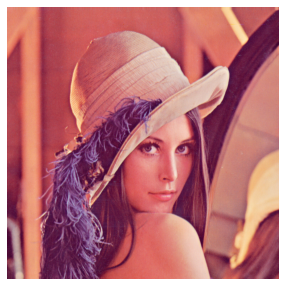

In [8]:
src = cv2.imread('lena.png')
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 5))
plt.axis("off")
plt.imshow(img)

In [11]:
def convert_image_matrix(img_name):
    src = cv2.imread(img_name)
    img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    name, ext = img_name.split('.')
    plt.imsave(str(f'{name}_gray.{ext}'), img, cmap='gray')
    gray_img = cv2.imread(str(f'{name}_gray.{ext}'), 0)
    gimg_shape = gray_img.shape
    gimg_mat = []
    for i in range(gimg_shape[0]):
        row = []
        for j in range(gimg_shape[1]):
            pixel = gray_img.item(i, j)
            row.append(pixel)
        gimg_mat.append(row)
    gimg_mat = np.array(gimg_mat)
    return gimg_mat

def get_sub_matrices(orig_matrix, kernel_size):
    width = len(orig_matrix[0])
    height = len(orig_matrix)
    if kernel_size[0] == kernel_size[1] and kernel_size[0] > 2:
        orig_matrix = np.pad(orig_matrix, kernel_size[0] - 2, mode='constant')
    giant_matrix = []
    for i in range(0, height - kernel_size[1] + 1):
        for j in range(0, width - kernel_size[0] + 1):
            giant_matrix.append(
                [
                    [orig_matrix[col][row] for row in range(j, j + kernel_size[0])]
                    for col in range(i, i + kernel_size[1])
                ]
            )
    return np.array(giant_matrix)

def get_transformed_matrix(matrix_sampling, kernel_filter):
    transform_mat = []
    for each_mat in matrix_sampling:
        transform_mat.append(
            np.sum(np.multiply(each_mat, kernel_filter))
        )
    reshape_val = int(math.sqrt(matrix_sampling.shape[0]))
    transform_mat = np.array(transform_mat).reshape(reshape_val, reshape_val)
    return transform_mat

In [ ]:
file = 'lena.png'
img_mat = convert_image_matrix(file)
identity_kernel 